## import libraries

In [1]:
import nextbike
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## read in raw data

In [2]:
dfRaw = nextbike.io.read_file()

## create Index for available bikes per fixed station based on time

In [3]:
dfStationBikeNumber = nextbike.io.preprocessStationData(dfRaw)
dfStationBikeNumber

,datetime,p_bikes,p_number
0,2019-01-20 02:06:00,5,5155
1,2019-01-20 14:16:00,4,5155
2,2019-01-20 00:00:00,5,5173
3,2019-01-20 01:55:00,5,5173
4,2019-01-20 02:06:00,4,5159
...,...,...,...
1561736,2019-12-31 23:59:00,5,5176
1561739,2019-12-31 18:51:00,1,5155
1561740,2019-12-31 21:44:00,3,5155
1561741,2019-12-31 14:30:00,17,5177


In [4]:
dfStationBikeNumber = nextbike.io.createBikeNumberPerStationIndex(dfStationBikeNumber)
dfStationBikeNumber

,5140,5141,5142,5143,5144,5145,5146,5147,5150,5151,...,5168,5169,5171,5172,5173,5174,5175,5176,5177,5178
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:01:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:02:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:03:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:04:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,5,2,7,1,3,5,8,2,1,1,...,2,3,2,1,1,3,1,6,18,1
2019-12-31 23:56:00,5,2,7,1,3,5,8,2,1,1,...,2,3,2,1,1,3,1,6,18,1
2019-12-31 23:57:00,5,2,7,1,3,5,8,2,1,1,...,2,3,2,1,1,3,1,6,18,1


## create station data

In [5]:
dfTrips = nextbike.io.preprocessData(dfRaw)
dfTrips

,datetime,b_number,trip,p_lat,b_bike_type,p_name,p_number,p_lng
3,2019-01-20 01:55:00,11169,start,50.795224,15,Südbahnhof,5173,8.763266
4,2019-01-20 02:06:00,11169,end,50.804522,15,Frankfurter Straße/Psychologie,5159,8.770358
5,2019-01-20 08:15:00,11169,start,50.804522,15,Frankfurter Straße/Psychologie,5159,8.770358
6,2019-01-20 11:39:00,11169,end,50.804522,15,Frankfurter Straße/Psychologie,5159,8.770358
7,2019-01-20 11:58:00,11169,start,50.804522,15,Frankfurter Straße/Psychologie,5159,8.770358
...,...,...,...,...,...,...,...,...
1561731,2019-12-31 22:44:00,11265,end,50.813203,15,Biegenstraße/Volkshochschule,5156,8.775948
1561734,2019-12-31 12:26:00,11080,start,50.824840,15,BIKE 11080,0,8.774508
1561735,2019-12-31 12:42:00,11080,end,50.807063,15,Universitätsstraße/Bibliothek Jura,5176,8.769918
1561738,2019-12-31 18:37:00,11299,start,50.824863,15,BIKE 11299,0,8.774459


In [6]:
dfStations = nextbike.io.createStations(dfTrips)
dfStations

,pName,pLat,pLong
pNumber,,,
0,no fixed station,NaN,NaN
5140,Anatomie,50.816058,8.772242
5141,Ketzerbach/Zwischenhausen,50.813950,8.766160
5142,Friedrichplatz,50.803270,8.764060
5143,Interkulturelle Gaerten/ Am Richtsberg,50.794700,8.772230
5144,Carolinenhaus/Elisabethkirche,50.814655,8.771212
5145,Neue Universitaetsbibliothek,50.813691,8.770734
5146,Cafe Traume/Affoellerwiesen,50.820220,8.771030
5147,Am Schuelerpark,50.812779,8.780602


## create trip data

In [7]:
dfTrips = nextbike.io.createTrips(dfTrips)

Error at lines:
128324
128580
128674
128824
128860
129114
129340
129513
130326
648905
649161
649255
649405
649441
649695
649921
650094
650907
1169486
1169742
1169836
1169986
1170022
1170276
1170502
1170675
1171488


In [8]:
dfTrips = nextbike.io.drop_outliers(dfTrips)

In [9]:
dfTrips

,bNumber,sTime,eTime,duration,sLong,sLat,eLong,eLat,weekend,bType,sPlaceNumber,ePlaceNumber,durationInSec
0,11169,2019-01-20 01:55:00,2019-01-20 02:06:00,00:11:00,8.763266,50.795224,8.770358,50.804522,True,15,5173,5159,660
1,11169,2019-01-20 08:15:00,2019-01-20 11:39:00,03:24:00,8.770358,50.804522,8.770358,50.804522,True,15,5159,5159,12240
2,11169,2019-01-20 11:58:00,2019-01-20 12:06:00,00:08:00,8.770358,50.804522,8.759248,50.804725,True,15,5159,5178,480
3,11169,2019-01-20 15:12:00,2019-01-20 15:27:00,00:15:00,8.759248,50.804725,8.774681,50.822927,True,15,5178,5150,900
4,11169,2019-01-20 15:39:00,2019-01-20 15:42:00,00:03:00,8.774681,50.822927,8.774681,50.822927,True,15,5150,5150,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
630913,11265,2019-12-31 18:53:00,2019-12-31 19:08:00,00:15:00,8.774454,50.824867,8.759248,50.804725,False,15,0,5178,900
630914,11265,2019-12-31 22:13:00,2019-12-31 22:22:00,00:09:00,8.759248,50.804725,8.775351,50.808070,False,15,5178,5158,540
630915,11265,2019-12-31 22:37:00,2019-12-31 22:44:00,00:07:00,8.775351,50.808070,8.775948,50.813203,False,15,5158,5156,420
630916,11080,2019-12-31 12:26:00,2019-12-31 12:42:00,00:16:00,8.774508,50.824840,8.769918,50.807063,False,15,0,5176,960


## save files

In [10]:
#nextbike.io.save_tripData(dfTrips)

In [11]:
#nextbike.io.save_StationData(dfStationBikeNumber)

## visualize number of bikes per station

In [12]:
m = nextbike.visualization.visualizeNumberOfBikesPerStationMap('2019-08-20 19:00:00', dfStations, dfStationBikeNumber)
m

## prediction

In [13]:
#dfTrips = pd.read_csv('../data/output')

In [14]:
dfWeather = nextbike.io.getWeatherData()
dfWeatherMinutes = pd.DataFrame({'date': pd.date_range('2019-01-01', '2020-01-01', freq='min', closed='left')})
dfWeatherMinutes = dfWeatherMinutes.set_index('date')
dfWeatherMinutes = dfWeatherMinutes.join(dfWeather)
dfWeatherMinutes = dfWeatherMinutes.fillna(axis='index', method='ffill')
dfWeatherMinutes

,temperature,precipitation
date,,
2019-01-01 00:00:00,7.6,0.0
2019-01-01 00:01:00,7.6,0.0
2019-01-01 00:02:00,7.6,0.0
2019-01-01 00:03:00,7.6,0.0
2019-01-01 00:04:00,7.6,0.0
...,...,...
2019-12-31 23:55:00,-2.5,0.0
2019-12-31 23:56:00,-2.5,0.0
2019-12-31 23:57:00,-2.5,0.0


In [15]:
dfTrips = dfTrips.join(dfWeatherMinutes, how='left', on='sTime')
dfTrips

,bNumber,sTime,eTime,duration,sLong,sLat,eLong,eLat,weekend,bType,sPlaceNumber,ePlaceNumber,durationInSec,temperature,precipitation
0,11169,2019-01-20 01:55:00,2019-01-20 02:06:00,00:11:00,8.763266,50.795224,8.770358,50.804522,True,15,5173,5159,660,-10.7,0.0
1,11169,2019-01-20 08:15:00,2019-01-20 11:39:00,03:24:00,8.770358,50.804522,8.770358,50.804522,True,15,5159,5159,12240,-8.7,0.0
2,11169,2019-01-20 11:58:00,2019-01-20 12:06:00,00:08:00,8.770358,50.804522,8.759248,50.804725,True,15,5159,5178,480,-2.2,0.0
3,11169,2019-01-20 15:12:00,2019-01-20 15:27:00,00:15:00,8.759248,50.804725,8.774681,50.822927,True,15,5178,5150,900,-1.1,0.0
4,11169,2019-01-20 15:39:00,2019-01-20 15:42:00,00:03:00,8.774681,50.822927,8.774681,50.822927,True,15,5150,5150,180,-1.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630913,11265,2019-12-31 18:53:00,2019-12-31 19:08:00,00:15:00,8.774454,50.824867,8.759248,50.804725,False,15,0,5178,900,0.3,0.0
630914,11265,2019-12-31 22:13:00,2019-12-31 22:22:00,00:09:00,8.759248,50.804725,8.775351,50.808070,False,15,5178,5158,540,-0.8,0.0
630915,11265,2019-12-31 22:37:00,2019-12-31 22:44:00,00:07:00,8.775351,50.808070,8.775948,50.813203,False,15,5158,5156,420,-1.1,0.0
630916,11080,2019-12-31 12:26:00,2019-12-31 12:42:00,00:16:00,8.774508,50.824840,8.769918,50.807063,False,15,0,5176,960,2.0,0.0


In [16]:
dfTrips = dfTrips.drop(columns=['eTime', 'eLong', 'eLat', 'ePlaceNumber'])
dfTrips['sMonth'] = dfTrips['sTime'].dt.month
dfTrips['sDay'] = dfTrips['sTime'].dt.weekday
dfTrips['sHour'] = dfTrips['sTime'].dt.hour
dfTrips['sMinute'] = dfTrips['sTime'].dt.minute
dfTrips = dfTrips.drop(columns=['sTime'])
dfTrips['duration'] = dfTrips['duration'].dt.total_seconds()
dfTrips

,bNumber,sTime,duration,sLong,sLat,weekend,bType,sPlaceNumber,durationInSec,temperature,precipitation
0,11169,2019-01-20 01:55:00,00:11:00,8.763266,50.795224,True,15,5173,660,-10.7,0.0
1,11169,2019-01-20 08:15:00,03:24:00,8.770358,50.804522,True,15,5159,12240,-8.7,0.0
2,11169,2019-01-20 11:58:00,00:08:00,8.770358,50.804522,True,15,5159,480,-2.2,0.0
3,11169,2019-01-20 15:12:00,00:15:00,8.759248,50.804725,True,15,5178,900,-1.1,0.0
4,11169,2019-01-20 15:39:00,00:03:00,8.774681,50.822927,True,15,5150,180,-1.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
630913,11265,2019-12-31 18:53:00,00:15:00,8.774454,50.824867,False,15,0,900,0.3,0.0
630914,11265,2019-12-31 22:13:00,00:09:00,8.759248,50.804725,False,15,5178,540,-0.8,0.0
630915,11265,2019-12-31 22:37:00,00:07:00,8.775351,50.808070,False,15,5158,420,-1.1,0.0
630916,11080,2019-12-31 12:26:00,00:16:00,8.774508,50.824840,False,15,0,960,2.0,0.0


In [17]:
dfTrips.corr()

,bNumber,sTime,duration,sLong,sLat,weekend,bType,sPlaceNumber,durationInSec,temperature,precipitation,sMonth,sDay,sHour,sMinute
0,11169,2019-01-20 01:55:00,00:11:00,8.763266,50.795224,True,15,5173,660,-10.7,0.0,1,6,1,55
1,11169,2019-01-20 08:15:00,03:24:00,8.770358,50.804522,True,15,5159,12240,-8.7,0.0,1,6,8,15
2,11169,2019-01-20 11:58:00,00:08:00,8.770358,50.804522,True,15,5159,480,-2.2,0.0,1,6,11,58
3,11169,2019-01-20 15:12:00,00:15:00,8.759248,50.804725,True,15,5178,900,-1.1,0.0,1,6,15,12
4,11169,2019-01-20 15:39:00,00:03:00,8.774681,50.822927,True,15,5150,180,-1.5,0.0,1,6,15,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630913,11265,2019-12-31 18:53:00,00:15:00,8.774454,50.824867,False,15,0,900,0.3,0.0,12,1,18,53
630914,11265,2019-12-31 22:13:00,00:09:00,8.759248,50.804725,False,15,5178,540,-0.8,0.0,12,1,22,13
630915,11265,2019-12-31 22:37:00,00:07:00,8.775351,50.808070,False,15,5158,420,-1.1,0.0,12,1,22,37
630916,11080,2019-12-31 12:26:00,00:16:00,8.774508,50.824840,False,15,0,960,2.0,0.0,12,1,12,26


## Principal Component Analysis

In [21]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import r2_score, mean_absolute_error 
# from sklearn.linear_model import LinearRegression
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# X = dfTrips[['weekend', 'sPlaceNumber', 'temperature', 'sMonth', 'sHour']].values
# Y = dfTrips[['duration']].values

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# scaler = StandardScaler()

# scaler.fit(x_train)

# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

# pca = PCA(.8)

# pca.fit(x_train)

# x_train = pca.transform(x_train)
# x_test = pca.transform(x_test)

# poly_reg = PolynomialFeatures (degree = 15)
# x_poly = poly_reg.fit_transform(x_train)

# model = LinearRegression(normalize = True, n_jobs=-1)
# model.fit(x_poly, y_train)

# y_pred_test = model.predict(poly_reg.fit_transform(x_test))
# y_pred_train = model.predict(poly_reg.fit_transform(x_train))
# print('R² Test: ' + str(r2_score(y_test, y_pred_test)))
# print('R² Train: ' + str(r2_score(y_train, y_pred_train)))
# print('MAE Test: ' + str(mean_absolute_error(y_test, y_pred_test)))
# print('MAE Train: ' + str(mean_absolute_error(y_train, y_pred_train)))

## Visualization of Train and Test Error for different Features and Polynomial Degrees

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error 
from sklearn.linear_model import LinearRegression

def plotPerformance (featureList, maxPolyDegree):

    polynomialDegrees = [*range(1,maxPolyDegree + 1,1)]
    r2_test = []
    mae_test = []
    r2_train = []
    mae_train = []

    for polynomialDegree in polynomialDegrees:

        X = dfTrips[featureList].values
        Y = dfTrips[['duration']].values

        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

        poly_reg = PolynomialFeatures (degree = polynomialDegree)
        x_poly = poly_reg.fit_transform(x_train)

        model = LinearRegression(normalize = True, n_jobs=-1)
        model.fit(x_poly, y_train)

        y_pred_test = model.predict(poly_reg.fit_transform(x_test))
        y_pred_train = model.predict(poly_reg.fit_transform(x_train))
        r2_test.append(r2_score(y_test, y_pred_test))
        r2_train.append(r2_score(y_train, y_pred_train))
        mae_test.append(mean_absolute_error(y_test, y_pred_test))
        mae_train.append(mean_absolute_error(y_train, y_pred_train))

    return r2_test, r2_train, mae_test, mae_train

In [23]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(['sMonth', 'sHour'], 15)

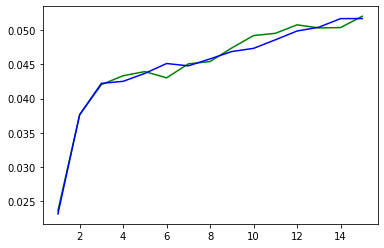

In [24]:
plt.plot([*range(1,16,1)], r2_test, color='green')
plt.plot([*range(1,16,1)], r2_train, color='blue')
plt.show()

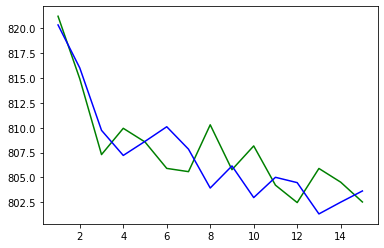

In [25]:
plt.plot([*range(1,16,1)], mae_test, color='green')
plt.plot([*range(1,16,1)], mae_train, color='blue')
plt.show()

In [26]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(['sMonth', 'sHour', 'temperature'], 15)

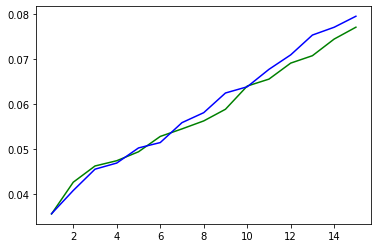

In [27]:
plt.plot([*range(1,16,1)], r2_test, color='green')
plt.plot([*range(1,16,1)], r2_train, color='blue')
plt.show()

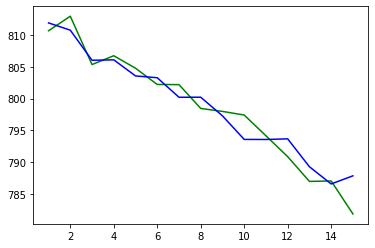

In [28]:
plt.plot([*range(1,16,1)], mae_test, color='green')
plt.plot([*range(1,16,1)], mae_train, color='blue')
plt.show()

In [29]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(['sMonth', 'sHour', 'temperature', 'weekend'], 15)

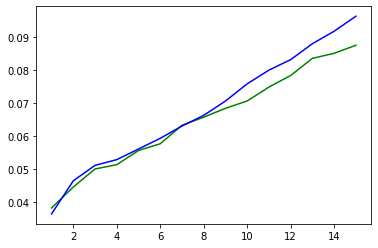

In [30]:
plt.plot([*range(1,16,1)], r2_test, color='green')
plt.plot([*range(1,16,1)], r2_train, color='blue')
plt.show()

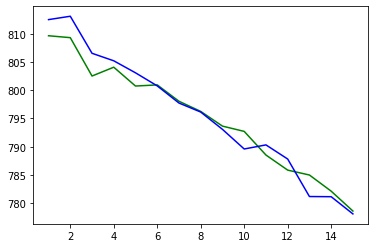

In [31]:
plt.plot([*range(1,16,1)], mae_test, color='green')
plt.plot([*range(1,16,1)], mae_train, color='blue')
plt.show()

In [23]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(['sMonth', 'sHour', 'temperature', 'sDay'], 15)

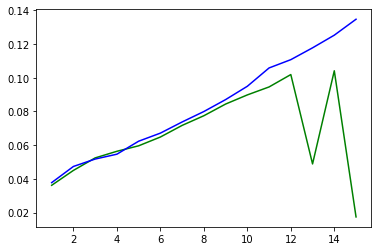

In [24]:
plt.plot([*range(1,16,1)], r2_test, color='green')
plt.plot([*range(1,16,1)], r2_train, color='blue')
plt.show()

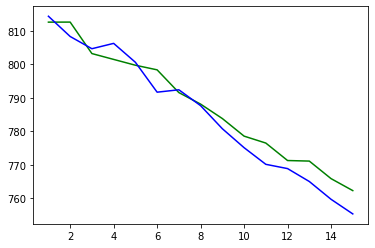

In [25]:
plt.plot([*range(1,16,1)], mae_test, color='green')
plt.plot([*range(1,16,1)], mae_train, color='blue')
plt.show()

In [26]:
r2_test, r2_train, mae_test, mae_train = plotPerformance(['sMonth', 'sHour', 'temperature', 'sDay', 'sPlaceNumber'], 15)

In [ ]:
plt.plot([*range(1,13,1)], r2_test, color='green')
plt.plot([*range(1,13,1)], r2_train, color='blue')
plt.show()

In [ ]:
plt.plot([*range(1,13,1)], mae_test, color='green')
plt.plot([*range(1,13,1)], mae_train, color='blue')
plt.show()